In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import tensorflow as tf
from tensorflow.keras import backend as k
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense, Dropout


In [2]:
molset_labeled = pd.read_csv('./data/moldset_labeled.csv', low_memory=False, index_col=False)

In [3]:
molset_labeled

,Unnamed: 0,_id,TimeStamp,PART_FACT_PLAN_DATE,PART_FACT_SERIAL,PART_NO,PART_NAME,EQUIP_CD,EQUIP_NAME,PassOrFail,...,Mold_Temperature_3,Mold_Temperature_4,Mold_Temperature_5,Mold_Temperature_6,Mold_Temperature_7,Mold_Temperature_8,Mold_Temperature_9,Mold_Temperature_10,Mold_Temperature_11,Mold_Temperature_12
0,0,5f8928bb9c0189cc666ef19b,2020-10-16 04:57:47,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,...,24.799999,27.500000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,5f8928de9c0189cc666ef20b,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,5f8928df9c0189cc666ef213,2020-10-16 04:58:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,...,24.799999,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,5f8928f39c0189cc666ef25e,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,23,86131AA000,CN7 W/S SIDE MLD'G LH,S14,650톤-우진2호기,0,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,5f8928f59c0189cc666ef265,2020-10-16 04:59:48,2020-10-16 오전 12:00:00,24,86141AA000,CN7 W/S SIDE MLD'G RH,S14,650톤-우진2호기,0,...,25.000000,27.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2388,5f928a009c0189cc667e9bfc,2020-10-23 07:44:00,2020-10-23 오전 12:00:00,11,86131T1000,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,0,...,23.700001,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2603,2389,5f928a2c9c0189cc667e9d13,2020-10-23 07:45:02,2020-10-23 오전 12:00:00,12,86141T1000,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,0,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2604,2390,5f928a2d9c0189cc667e9d19,2020-10-23 07:45:02,2020-10-23 오전 12:00:00,11,86131T1000,"RG3 MOLD'G W/SHLD, LH",S14,650톤-우진2호기,0,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2605,2391,5f928a669c0189cc667e9e61,2020-10-23 07:46:03,2020-10-23 오전 12:00:00,12,86141T1000,"RG3 MOLD'G W/SHLD, RH",S14,650톤-우진2호기,0,...,23.600000,25.200001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
molset_labeled["PART_NO"].value_counts()
parts = ["86141AA000", "86131AA000", "86131T1000", "86141T1000"]

In [4]:
molset_labeled.columns

Index(['Unnamed: 0', '_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
       'PART_FACT_SERIAL', 'PART_NO', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME',
       'PassOrFail', 'Reason', 'Injection_Time', 'Filling_Time',
       'Plasticizing_Time', 'Cycle_Time', 'Clamp_Close_Time',
       'Cushion_Position', 'Switch_Over_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Barrel_Temperature_7', 'Hopper_Temperature',
       'Mold_Temperature_1', 'Mold_Temperature_2', 'Mold_Temperature_3',
       'Mold_Temperature_4', 'Mold_Temperature_5', 'Mold_Temperature_6',
       'Mold_Temperature_7', 'Mold_Temperature_8', 'Mold_Temperature_9',
       'Mold_Temperat

In [4]:
molset_labeled.drop(columns=['Unnamed: 0','_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
                             'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'Reason',
                             'Mold_Temperature_1', 'Mold_Temperature_2','Barrel_Temperature_7','Switch_Over_Position',
                             'Mold_Temperature_5', 'Mold_Temperature_6','Mold_Temperature_7', 'Mold_Temperature_8',
                             'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
                             'Mold_Temperature_12'], inplace=True)

In [5]:
molset_unlabeled = pd.read_csv('./data/unlabeled_data.csv', index_col=False)
molset_unlabeled.drop(columns=['Unnamed: 0','_id', 'TimeStamp', 'PART_FACT_PLAN_DATE',
                             'PART_FACT_SERIAL', 'PART_NAME', 'EQUIP_CD', 'EQUIP_NAME', 'ERR_FACT_QTY', 
                             'Mold_Temperature_1', 'Mold_Temperature_2','Barrel_Temperature_7',
                             'Switch_Over_Position','Mold_Temperature_7', 
                             'Mold_Temperature_5', 'Mold_Temperature_6','Mold_Temperature_8',
                             'Mold_Temperature_9', 'Mold_Temperature_10', 'Mold_Temperature_11',
                             'Mold_Temperature_12'], inplace=True)

#### molset_unlabeled.columns

In [8]:
len(molset_labeled.columns)

26

In [6]:
molset_labeled

,PART_NO,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
0,86141AA000,0,9.59,4.47,16.92,59.520000,7.13,653.409973,68.849998,647.98999,...,59.299999,276.500000,274.700012,274.799988,269.200012,255.000000,229.699997,66.300003,24.799999,27.500000
1,86141AA000,0,9.60,4.48,16.91,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
2,86131AA000,0,9.60,4.48,16.91,59.580002,7.13,653.409973,68.839996,647.98999,...,59.299999,276.200012,275.500000,275.299988,270.799988,254.699997,229.500000,67.199997,24.799999,27.600000
3,86131AA000,0,9.59,4.48,16.91,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
4,86141AA000,0,9.59,4.48,16.91,59.560001,7.13,653.419983,68.839996,647.98999,...,59.299999,276.500000,275.000000,275.399994,271.100006,254.899994,230.000000,66.900002,25.000000,27.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,86131T1000,0,1.06,0.94,12.87,61.759998,6.80,654.239990,53.590000,4.63000,...,61.599998,286.399994,285.200012,285.000000,276.000000,265.100006,235.300003,65.599998,23.700001,25.200001
2603,86141T1000,0,1.06,0.94,12.85,61.740002,6.79,654.239990,53.599998,4.63000,...,61.500000,286.700012,285.100006,285.000000,276.000000,264.700012,234.699997,65.599998,23.600000,25.200001
2604,86131T1000,0,1.06,0.94,12.85,61.740002,6.79,654.239990,53.599998,4.63000,...,61.500000,286.700012,285.100006,285.000000,276.000000,264.700012,234.699997,65.599998,23.600000,25.200001
2605,86141T1000,0,1.06,0.94,12.90,61.720001,6.80,654.250000,53.599998,4.63000,...,61.500000,285.299988,285.799988,284.799988,275.700012,265.000000,234.800003,65.500000,23.600000,25.200001


In [9]:
moldset_labeled_cn7 = molset_labeled[(molset_labeled["PART_NO"]==parts[0]) | ((molset_labeled["PART_NO"])==parts[1])].copy()
moldset_labeled_rg3 = molset_labeled[(molset_labeled["PART_NO"]==parts[2]) | ((molset_labeled["PART_NO"])==parts[3])].copy()
moldset_unlabeled_cn7 = molset_unlabeled[(molset_unlabeled["PART_NO"]==parts[0]) | ((molset_unlabeled["PART_NO"])==parts[1])].copy()
moldset_unlabeled_rg3 = molset_unlabeled[(molset_unlabeled["PART_NO"]==parts[2]) | ((molset_unlabeled["PART_NO"])==parts[3])].copy()

In [10]:
moldset_labeled_cn7.drop(columns=["PART_NO"], inplace=True)
moldset_labeled_rg3.drop(columns=["PART_NO"], inplace=True)
moldset_unlabeled_cn7.drop(columns=["PART_NO"], inplace=True)
moldset_unlabeled_rg3.drop(columns=["PART_NO"], inplace=True)

In [11]:
moldset_unlabeled_cn7.columns

Index(['Injection_Time', 'Filling_Time', 'Plasticizing_Time', 'Cycle_Time',
       'Clamp_Close_Time', 'Cushion_Position', 'Plasticizing_Position',
       'Clamp_Open_Position', 'Max_Injection_Speed', 'Max_Screw_RPM',
       'Average_Screw_RPM', 'Max_Injection_Pressure',
       'Max_Switch_Over_Pressure', 'Max_Back_Pressure',
       'Average_Back_Pressure', 'Barrel_Temperature_1', 'Barrel_Temperature_2',
       'Barrel_Temperature_3', 'Barrel_Temperature_4', 'Barrel_Temperature_5',
       'Barrel_Temperature_6', 'Hopper_Temperature', 'Mold_Temperature_3',
       'Mold_Temperature_4'],
      dtype='object')

<Axes: >

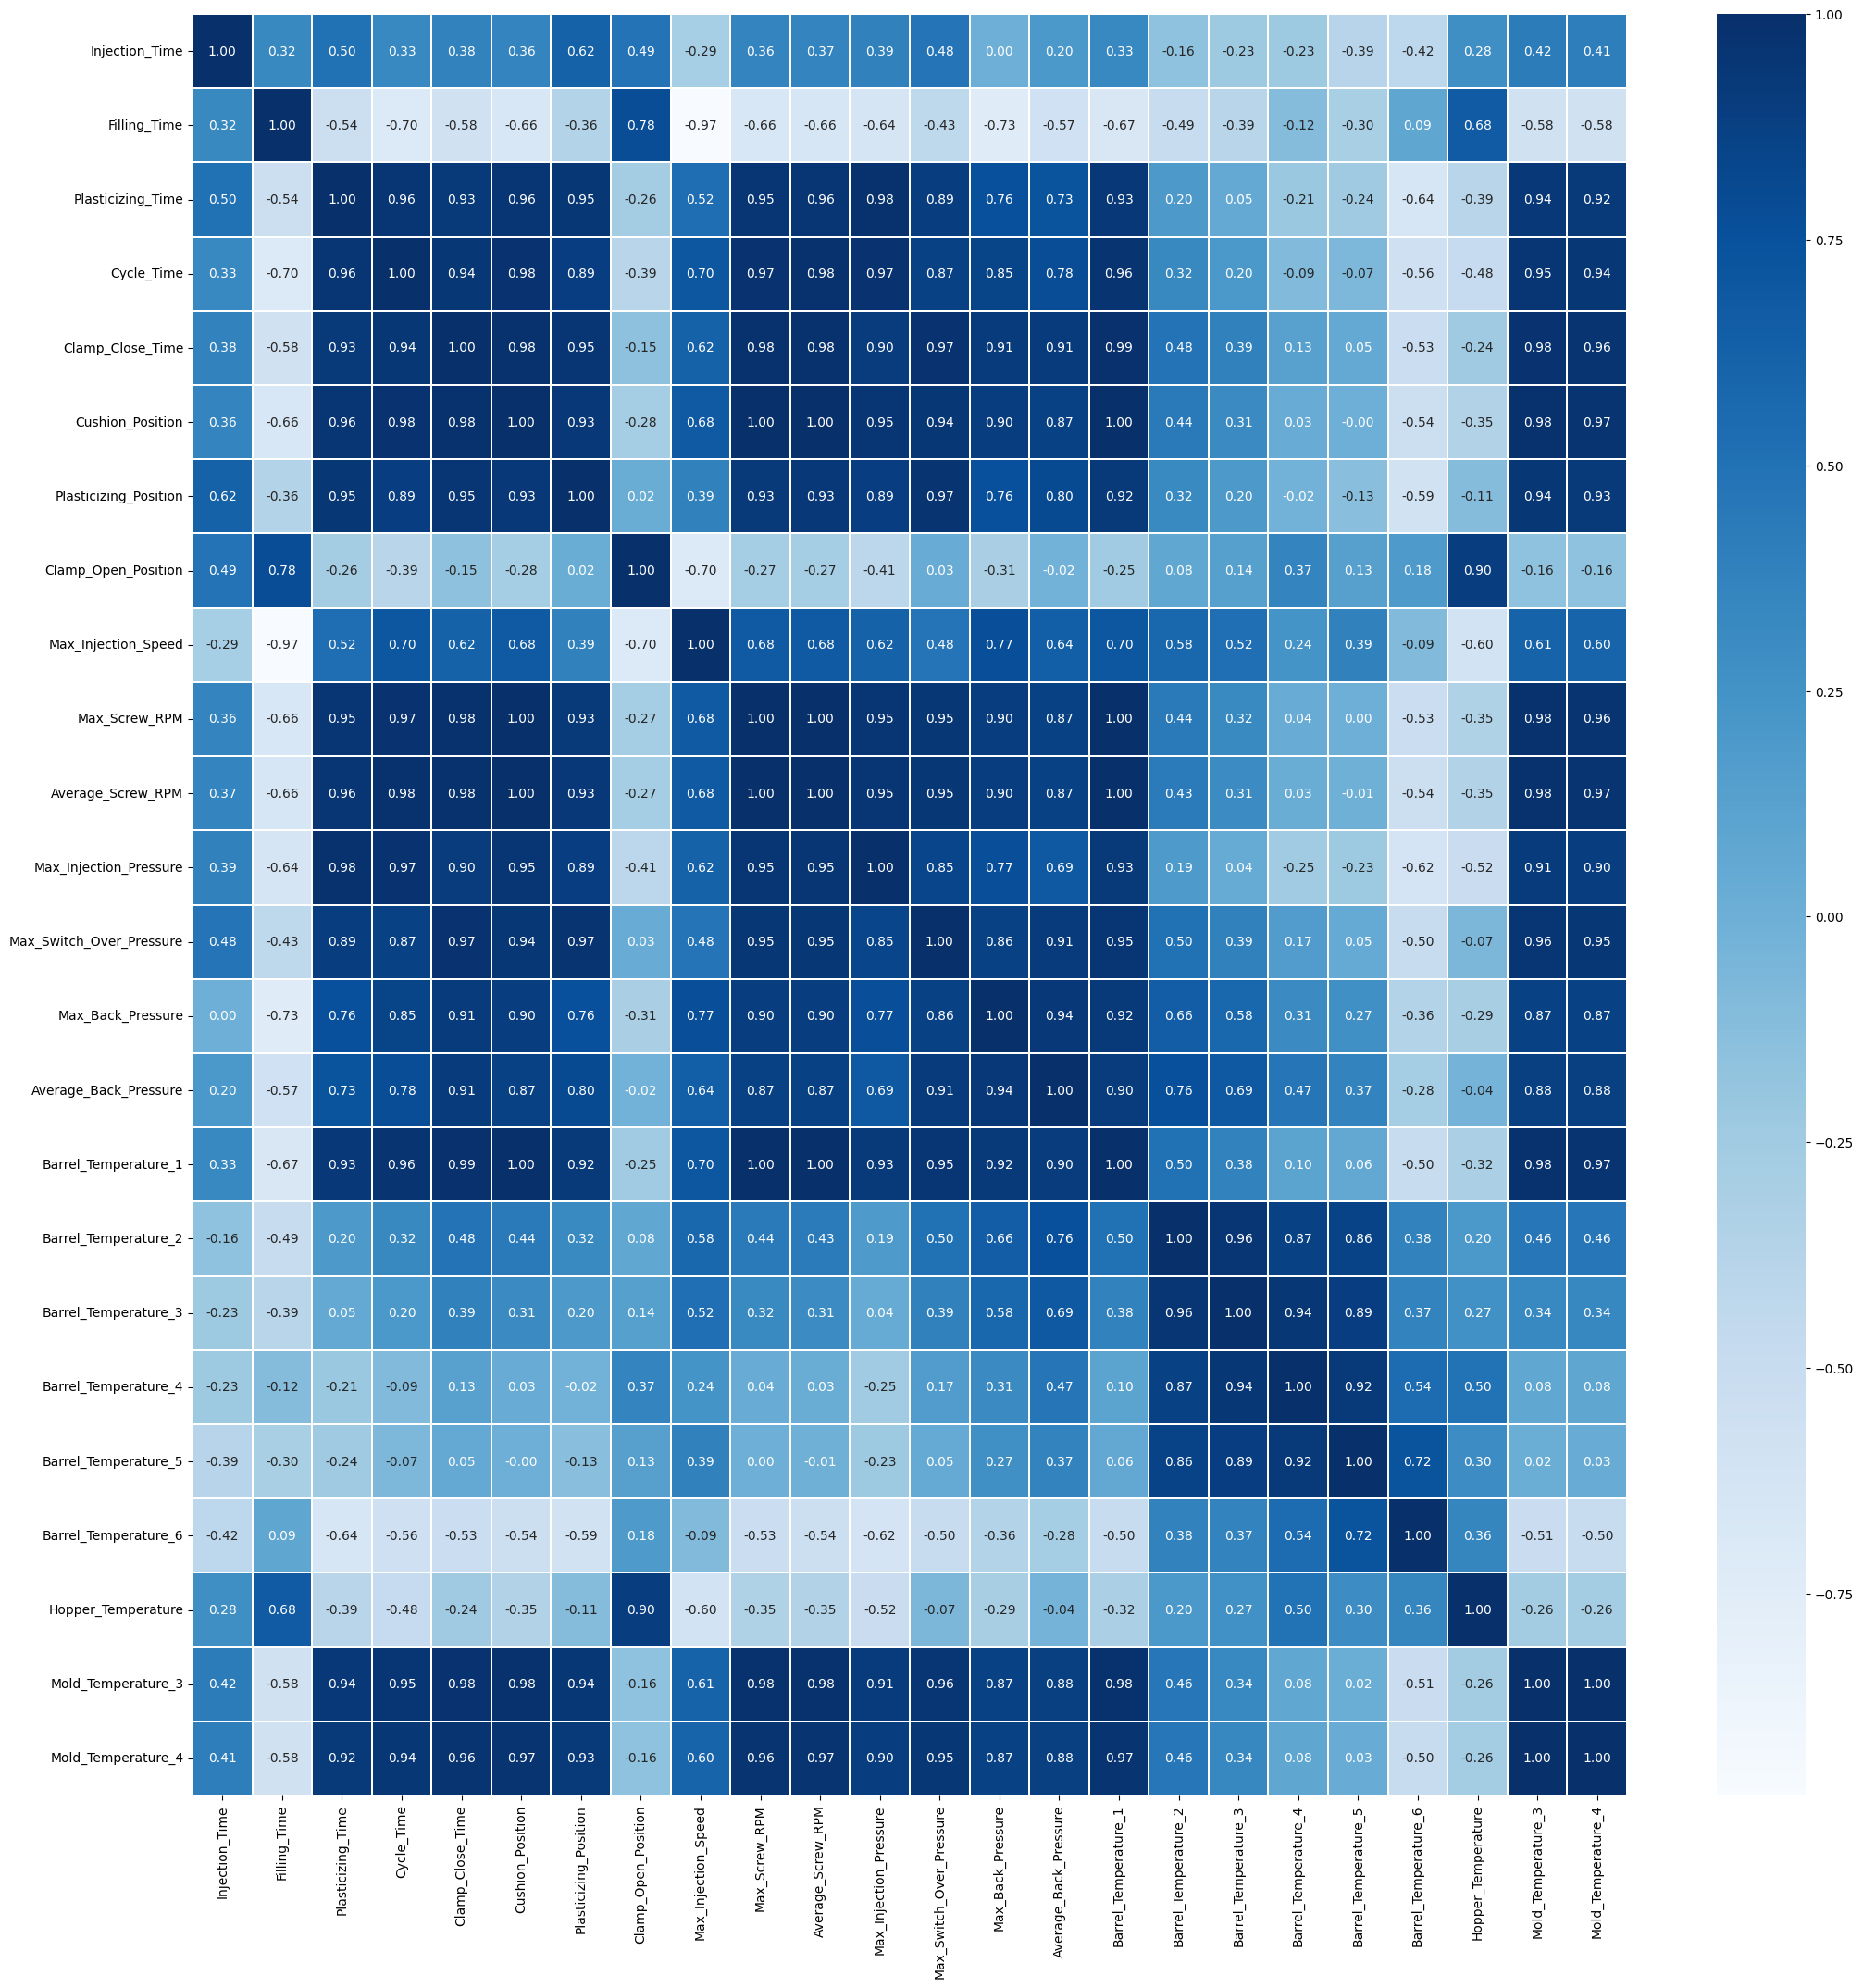

In [12]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_cn7.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

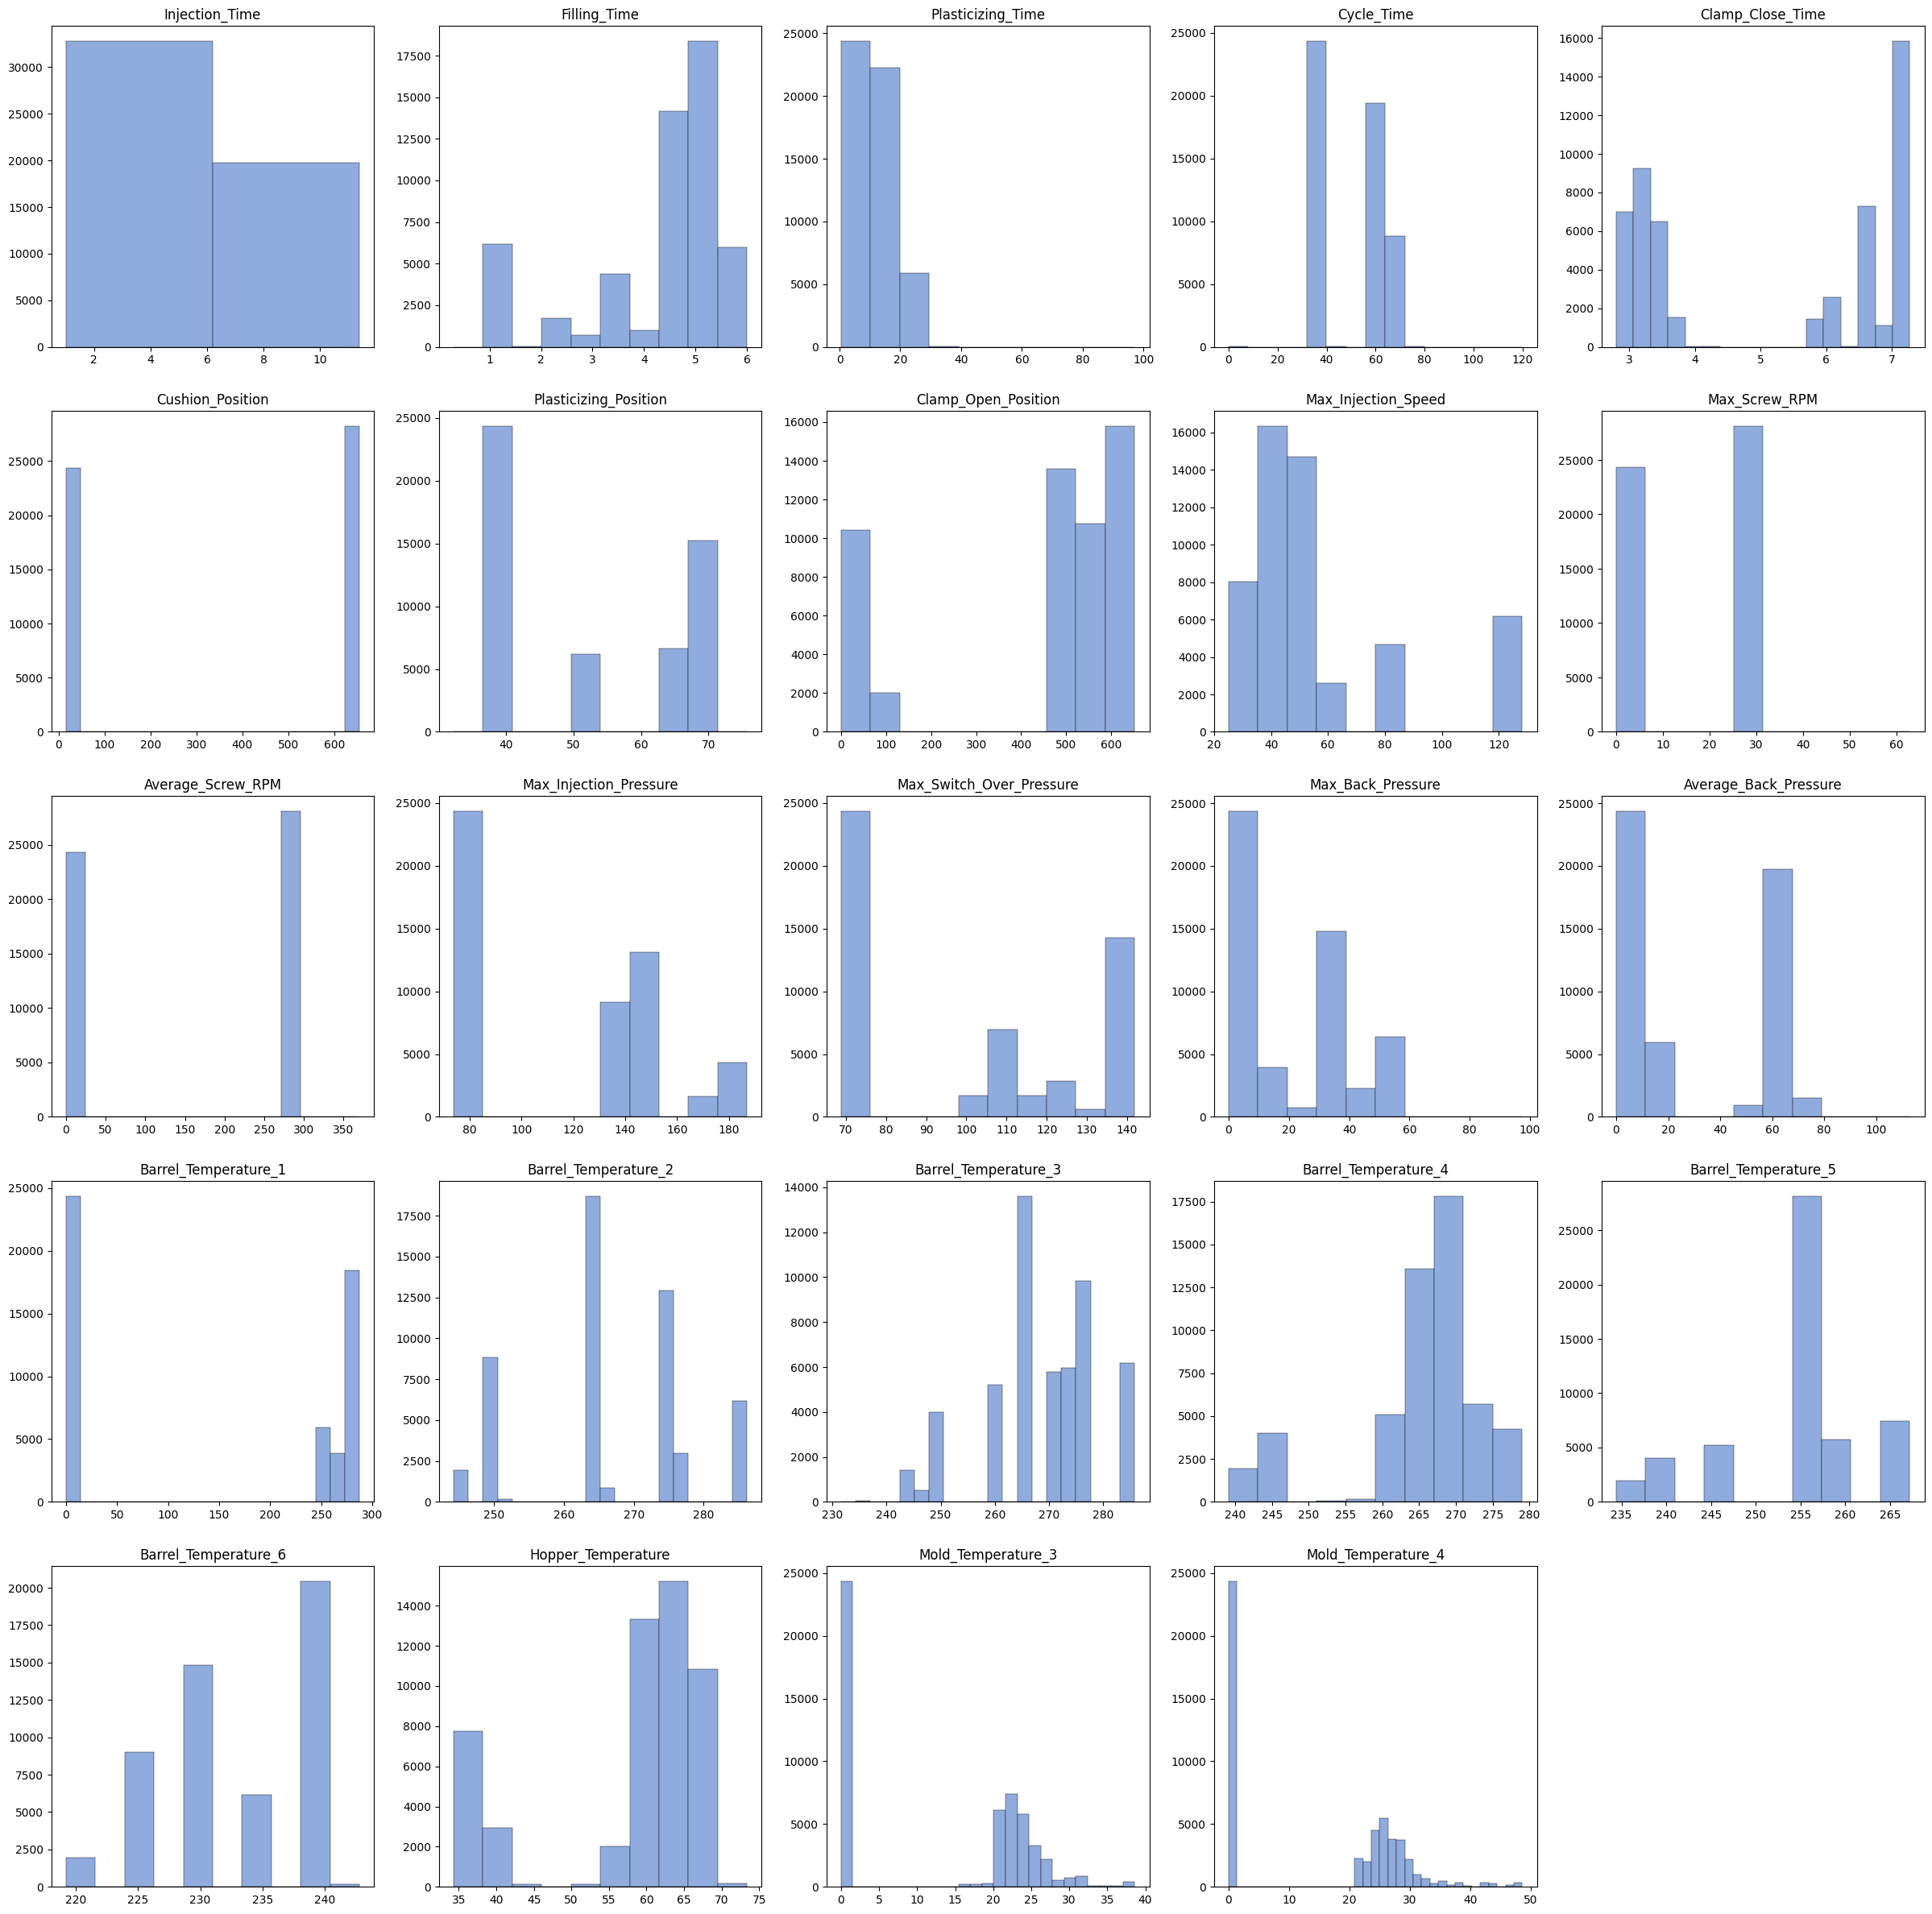

In [13]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(moldset_unlabeled_cn7):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(moldset_unlabeled_cn7[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


<Axes: >

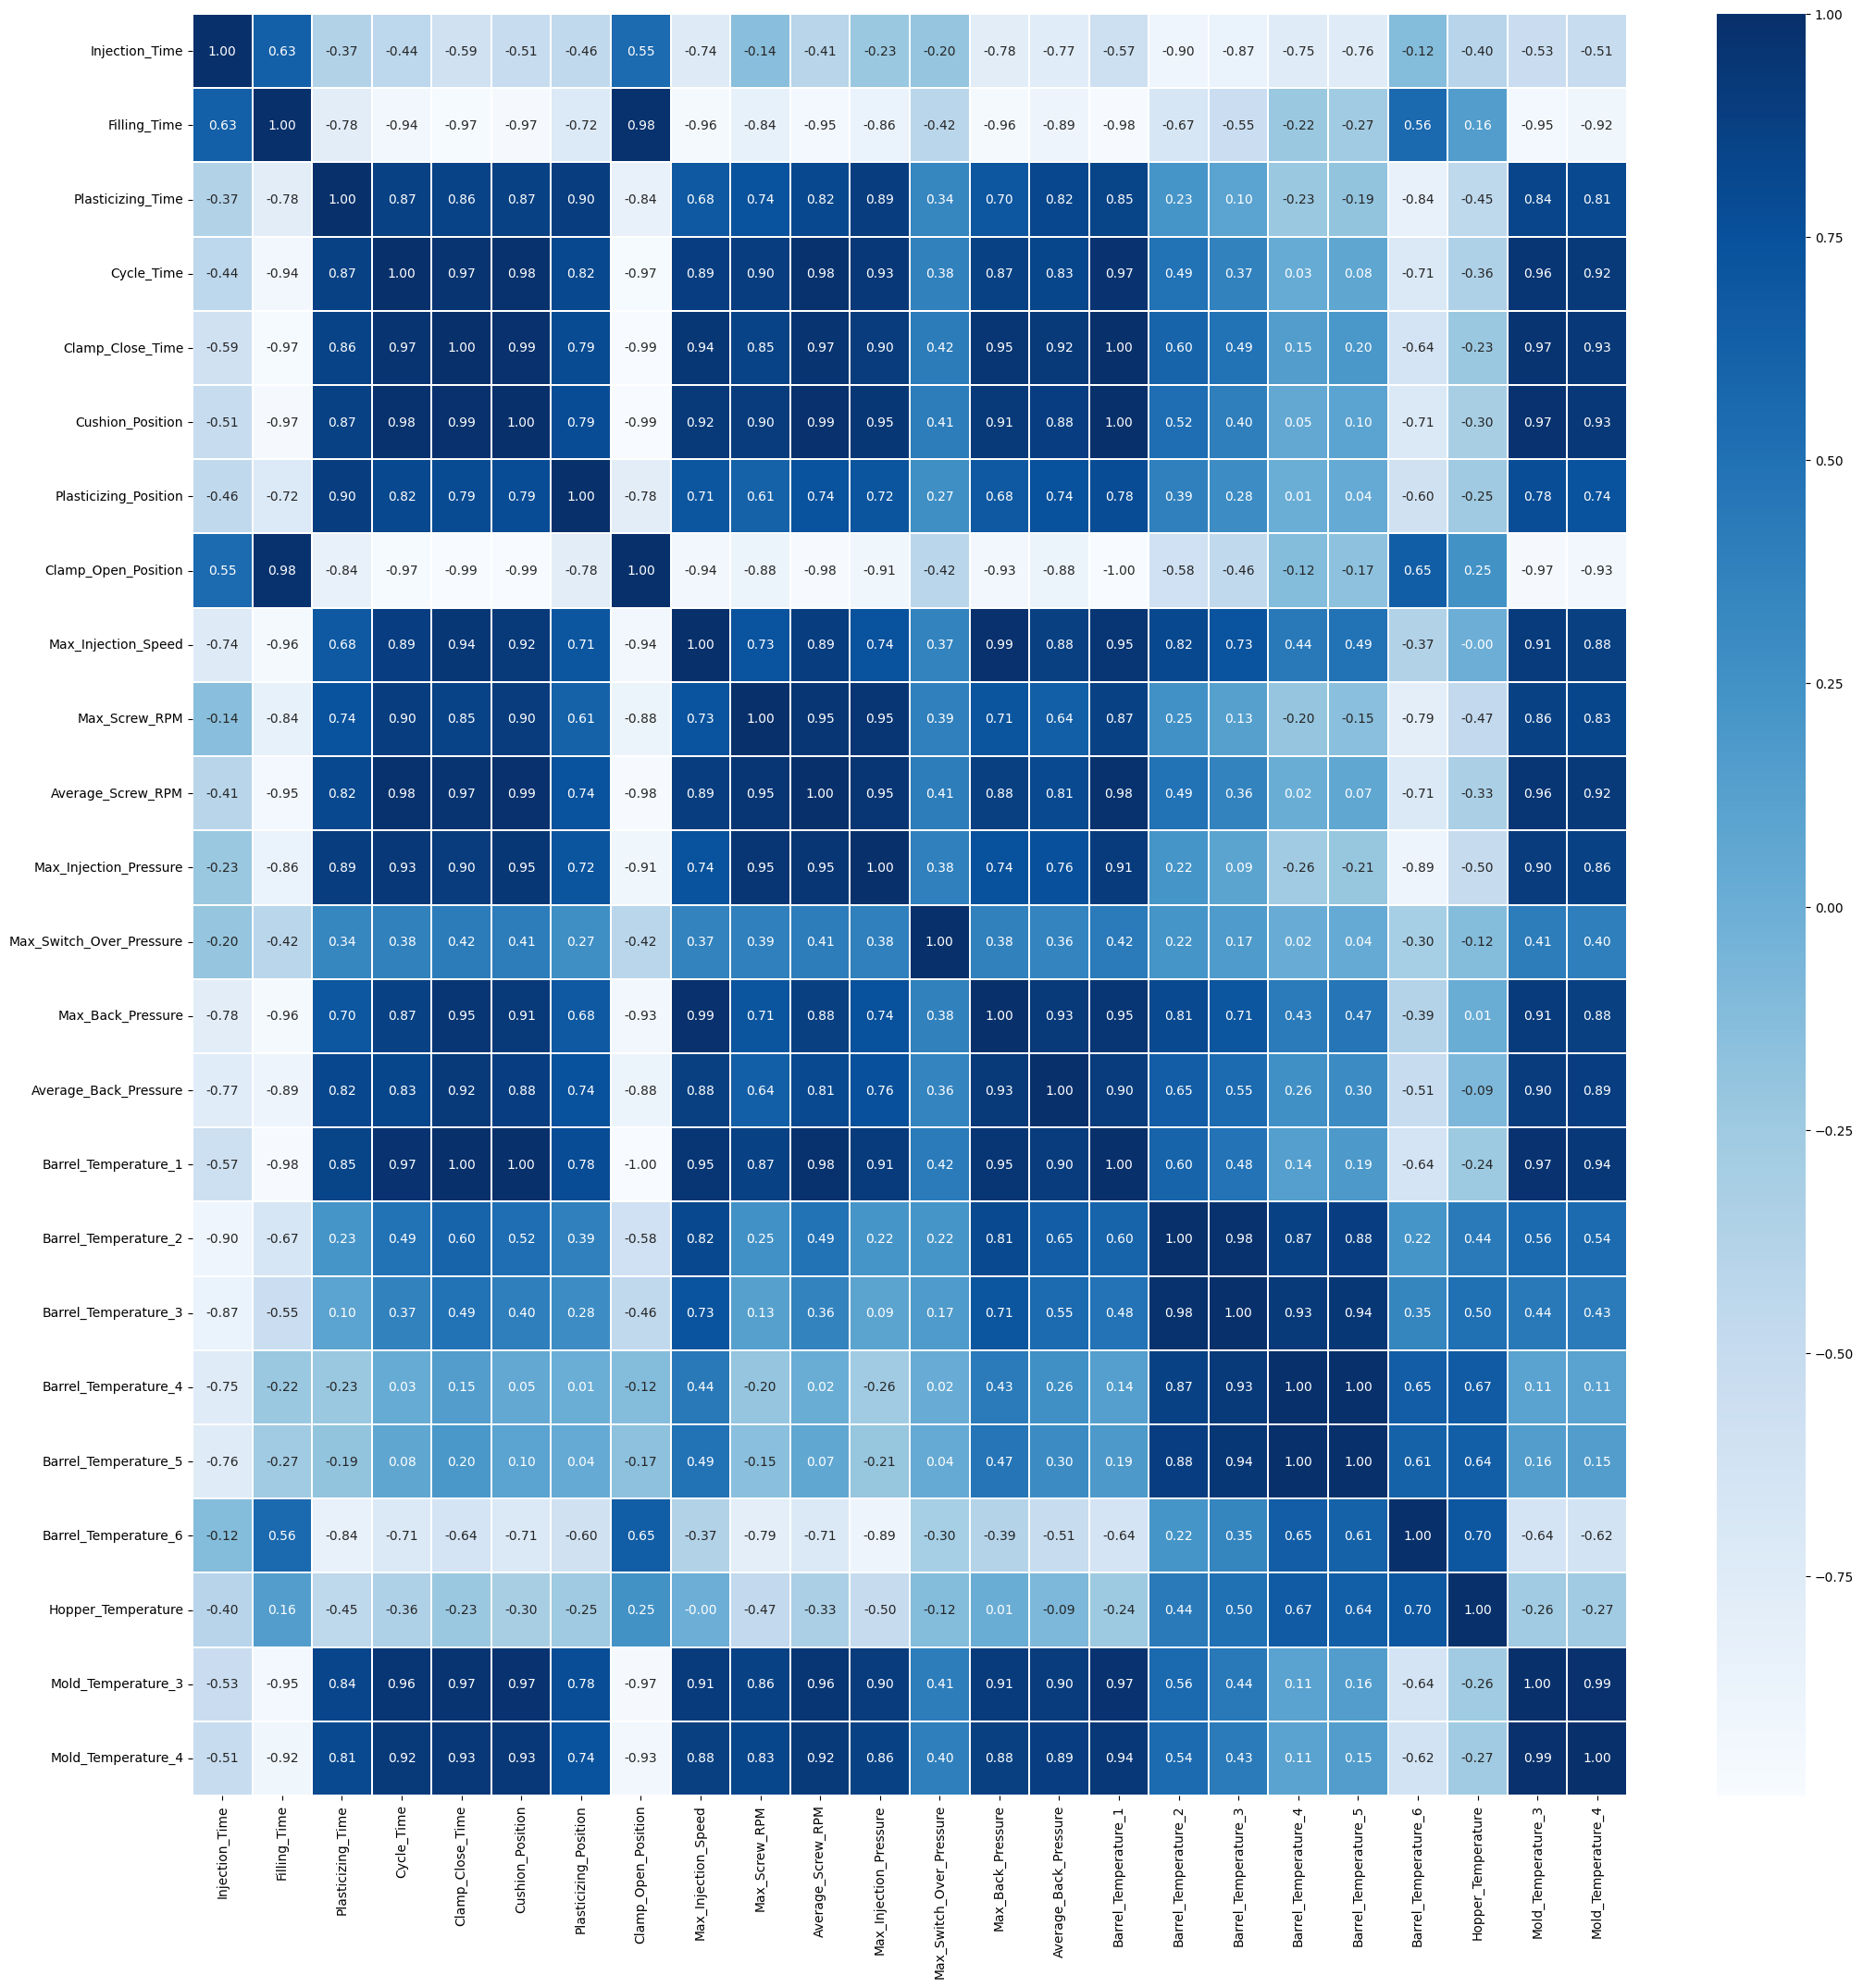

In [14]:
plt.subplots(figsize=(25,25))
sns.heatmap(data = moldset_unlabeled_rg3.corr(), linewidths=0.1, annot=True, fmt='.2f', cmap='Blues')

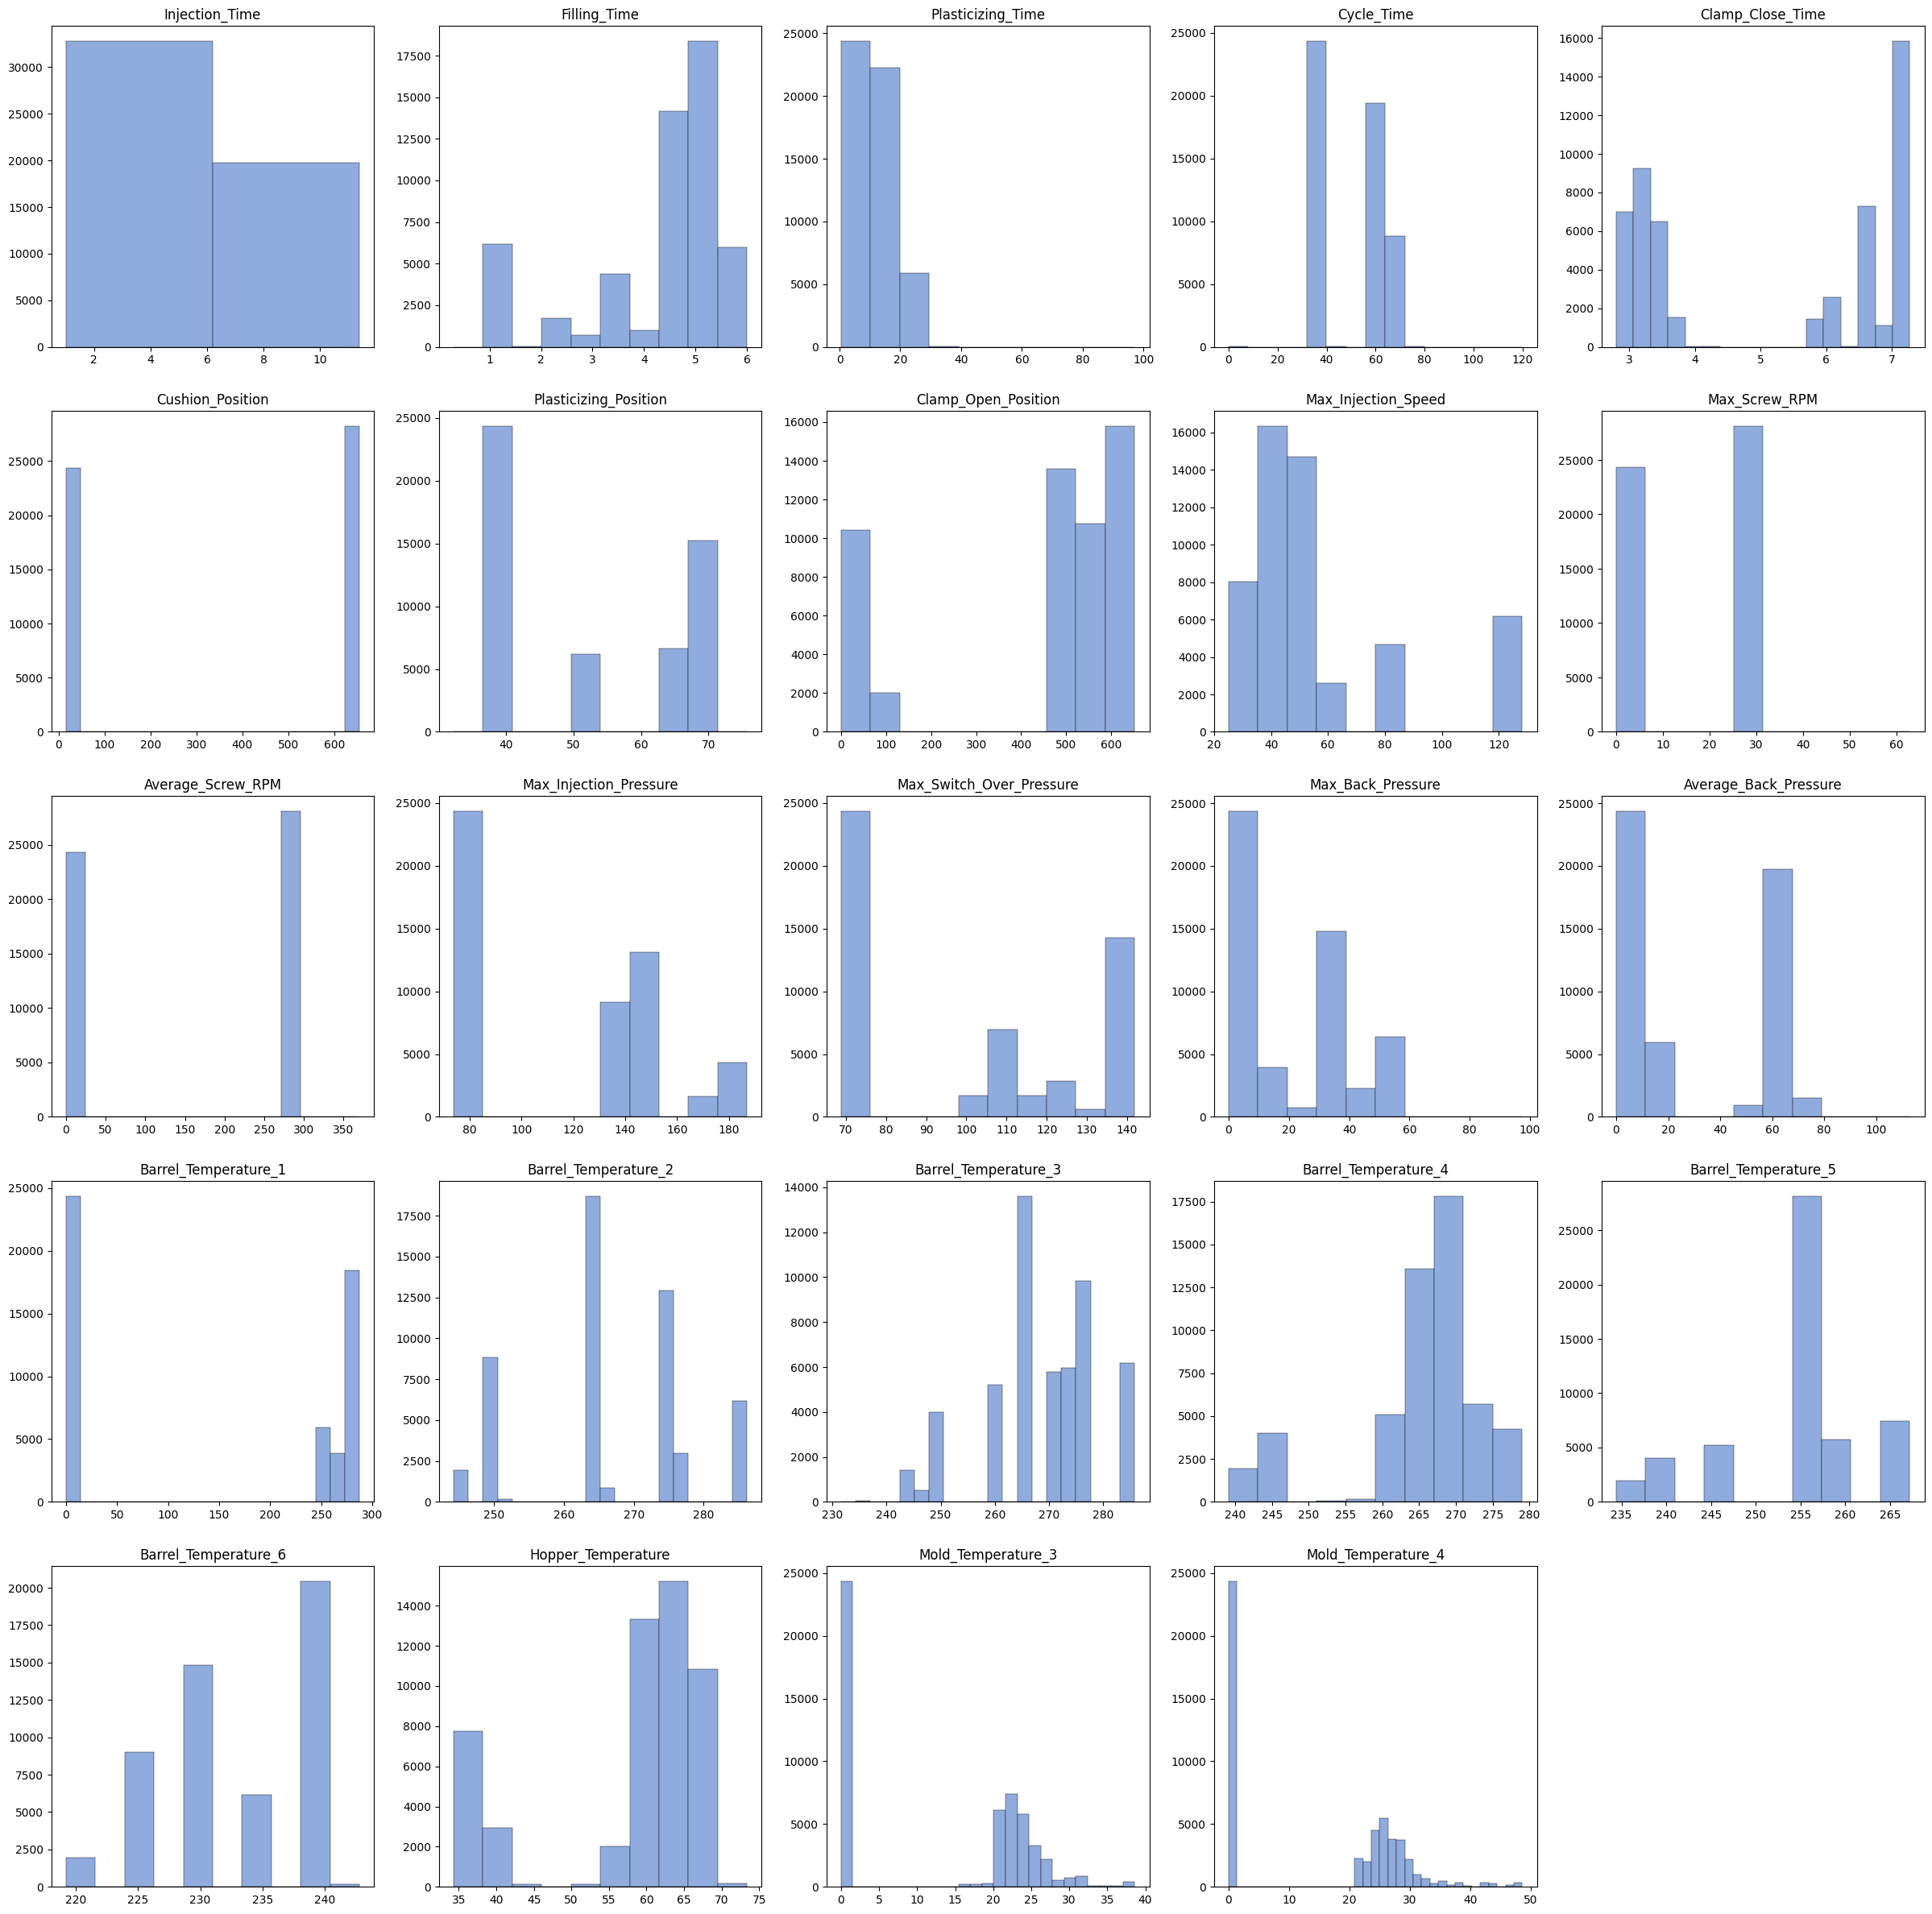

In [15]:
plt.figure(figsize=(30, 30))
bin = [2, 10, 10, 15, 17, 20, 10, 10, 10, 10, 15, 10, 10, 10, 10, 20, 20, 20, 10, 10, 10, 10, 25, 35, 35]
for index, value in enumerate(moldset_unlabeled_rg3):
    sub = plt.subplot(5, 5, index + 1)
    sub.hist(moldset_unlabeled_cn7[value], bins=bin[index], facecolor=(144/255,171/255,221/255), linewidth=0.3, edgecolor='black')
    plt.title(value)


In [17]:
labeled_data = [moldset_labeled_cn7, moldset_labeled_rg3]
for d in labeled_data:
    print(f"양품수 : {d[d['PassOrFail']==0].shape[0]}")
    print(f"불량수 : {d[d['PassOrFail']==1].shape[0]}")
    print(f"=========================")

양품수 : 1398
불량수 : 27
양품수 : 1157
불량수 : 25


In [18]:
from sklearn.preprocessing import StandardScaler

data = [moldset_labeled_cn7, moldset_labeled_rg3, moldset_unlabeled_cn7, moldset_unlabeled_rg3]
for d in data:
    for column in d.columns:
        if column != 'PassOrFail':
            sc = StandardScaler()
            d[[column]] = sc.fit_transform(d[[column]])


In [19]:
moldset_labeled_cn7.to_csv(r'moldset_labeled_cn7.csv')
moldset_labeled_rg3.to_csv(r'moldset_labeled_rg3.csv')
moldset_unlabeled_cn7.to_csv(r'moldset_unlabeled_cn7.csv')
moldset_unlabeled_rg3.to_csv(r'moldset_unlabeled_rg3.csv')

In [20]:
def confident_prediction(df):
    result = []
    for i in range(len(df)):
        if df[i][0] >= df[i][1]:
            result.append(df[i][0])
        else:
            result.append(df[i][1])
    return result

In [22]:
from sklearn.metrics import classification_report, precision_score, recall_score, roc_auc_score, accuracy_score, f1_score, confusion_matrix

In [23]:
def evaluation(y, y_pred):
    print(f"Accuracy: {accuracy_score(y, y_pred)}")
    print(f"Precision: {precision_score(y, y_pred)}")
    print(f"Recall: {recall_score(y, y_pred)}")
    print(roc_auc_score(y, y_pred))
    print(f1_score(y, y_pred))
    print(confusion_matrix(y, y_pred))

In [24]:
class DataLoader():
    def __init__(self):
        # 클래스 변수가 존재하는 데이터를 불러옴
        moldset_labeled = pd.read_csv(r'./moldset_labeled_cn7.csv', low_memory=False, index_col=False)

        # 클래스 변수가 존재하지 않는 데이터를 불러옴
        moldset_unlabeled = pd.read_csv(r'./moldset_unlabeled_cn7.csv', low_memory=False, index_col=False)

        # 평가 데이터의 비율을 test_size로 지정함
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
        for train_index, test_index in sss.split(
            moldset_labeled.loc[:, moldset_labeled.columns != 'PassOrFail'],
            moldset_labeled['PassOrFail']
        ):
            moldset_labeled_train_X = moldset_labeled.loc[:, moldset_labeled.columns != 'PassOrFail'].iloc[train_index]
            moldset_labeled_test_X = moldset_labeled.loc[:, moldset_labeled.columns != 'PassOrFail'].iloc[test_index]
            moldset_labeled_train_Y = moldset_labeled['PassOrFail'].iloc[train_index]
            moldset_labeled_test_Y = moldset_labeled['PassOrFail'].iloc[test_index]

        # 학습 데이터
        self.moldset_labeled_train_X = moldset_labeled_train_X
        self.moldset_labeled_train_Y = moldset_labeled_train_Y

        # 평가 데이터
        self.moldset_labeled_test_X = moldset_labeled_test_X
        self.moldset_labeled_test_Y = moldset_labeled_test_Y

        # 클래스 변수가 없는 데이터
        self.moldset_unlabeled = moldset_unlabeled


In [85]:
# 모델 생성
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

rf = RandomForestClassifier(random_state=42)
et = ExtraTreesClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
hgb = HistGradientBoostingClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)

model_list = [rf, et, gb, hgb, xgb]

In [86]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

# 히스토그램 기반 그라디언트 부스팅 모델
model = HistGradientBoostingClassifier(random_state=42)

# 하이퍼파라미터 그리드




grid_df = pd.DataFrame()
scores = ['accuracy', 'precision', 'recall', 'f1']
weights = {0: 100.0, 1: 1.0}
kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv('./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
y = X.pop('PassOrFail')
for score in scores:
    # GridSearchCV 이용해서 모든 모델 하이퍼파라미터 튜닝
    for model in model_list:
        model_name = model.__class__.__name__
        gridParams = dict()
        if model_name =="XGBClassifier" :
            gridParams["n_estimators"] = [20,50]
            gridParams["max_depth"] = [10,20]
            gridParams["min_child_weight"] = [1, 2,4]
        
        elif model_name == "HistGradientBoostingClassifier" :
            gridParams["max_iter"] = [20, 50]
            gridParams["max_depth"] = [10, 50]
            gridParams["min_samples_leaf"] = [1,2,4]
            
        else :
            gridParams["n_estimators"] = [20, 50]
            gridParams["max_depth"] = [10,20]
            gridParams["min_samples_split"] = [2,5,10]
            gridParams["min_samples_leaf"] = [1,2,4]
        
        grid_search_model = GridSearchCV(model, gridParams, cv=5, n_jobs=-1)
        grid_search_model.fit(X, y)
        model = grid_search_model.best_estimator_
        pred = model.predict(X)
        acc = model.score(y, pred)
        pre = precision_score(y, pred)
        rec = recall_score(y, pred)
        f1 = f1_score(y, pred)
        df_temp = pd.DataFrame([[model_name,  acc, pre, rec, f1]],
                                 columns=["모델명", "정확도", 
                                          "정밀도", "재현율", "f1-score"])
        grid_df = pd.concat([grid_df, df_temp], ignore_index=True)
        



C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(
C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [84]:
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, HistGradientBoostingClassifier
from sklearn.svm import SVC

gridParams = {
    "max_iter": [50, 100, 200],
    "max_depth": [10, 20, None],
    "min_samples_leaf": [1, 2, 4],
    "learning_rate": [0.01, 0.1, 0.2],
    "l2_regularization": [0.0, 1.0, 10.0],
    "max_bins": [255, 512],
    "categorical_features": ["auto", None]
}
scores = ['accuracy', 'precision', 'recall', 'f1']
kf = StratifiedKFold(random_state=42, n_splits=5, shuffle=True)
X = pd.read_csv('./moldset_labeled_cn7.csv', low_memory=False, index_col=False)
y = X.pop('PassOrFail')
for score in scores:
    clf = GridSearchCV(HistGradientBoostingClassifier(), scoring=score, param_grid=gridParams,
                       n_jobs=-1, cv=kf, refit=True, verbose=0)
    clf.fit(X, y)
    print('Best Params: {}'.format(clf.best_params_))
    print(f"Best {score.capitalize()}: {clf.best_score_:.4f}")



C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3645 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Params: {'categorical_features': None, 'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_bins': 255, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 4}
Best Accuracy: 0.9860


C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3645 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Params: {'categorical_features': None, 'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_bins': 255, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 4}
Best Precision: 0.6600


C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3645 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

Best Params: {'categorical_features': None, 'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_bins': 255, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 1}
Best Recall: 0.5933
Best Params: {'categorical_features': None, 'l2_regularization': 0.0, 'learning_rate': 0.01, 'max_bins': 255, 'max_depth': 10, 'max_iter': 100, 'min_samples_leaf': 4}
Best F1: 0.6165


C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
3645 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Admin\anaconda3\envs\dg_env_dl\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_paramete

In [82]:
# 7-1-1. 모델 학습 및 평가 함수 가이드
def train_and_evaluate(percentage=10, unlabeled_usage=90):
    data = DataLoader()
    X_test = data.moldset_labeled_test_X
    Y_test = data.moldset_labeled_test_Y
    X_with_label = data.moldset_labeled_train_X
    Y_with_label = data.moldset_labeled_train_Y
    moldset_unlabeled = data.moldset_unlabeled
    without_label = moldset_unlabeled

    # 남은 클래스 분산이 존재하지 않는 데이터의 개수
    num_left_unlabeled = int(moldset_unlabeled.shape[0] * (100 - unlabeled_usage) * 0.01)

    # 7-1-2. 구현된 모델 불러오기 / 모델 정의 가이드
    while True:
        if without_label.shape[0] >= num_left_unlabeled:
            # 클래스 별 데이터 비율
            weights = {0: 100.0, 1: 1.0}

            # 최적의 하이퍼파라미터 사용
            model = SVC(C=1, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
            model.fit(X_with_label, Y_with_label)
            Y_pred = model.predict(X_test)
            evaluation(Y_test, Y_pred)

            # 7-1-3. Unlabeled 데이터에 대한 예측
            prob = model.predict_proba(without_label)
            confident_prob = confident_prediction(prob)
            confident_prediction(prob)
            without_label['confidence'] = confident_prob

            # 이 과정에서 내림차순 정렬
            without_label = without_label.sort_values(by=['confidence'], ascending=False)
            length = without_label.shape[0]
            cutting_index = int(length * (percentage * 0.01))

            chosen_without_label = without_label.iloc[:cutting_index, :].copy()
            chosen_without_label.drop(columns=['confidence'], inplace=True)
            notchosen_without_label = without_label.iloc[cutting_index:, :].drop(columns=['confidence']).copy()
            pseudo_label = pd.DataFrame(model.predict(chosen_without_label))
            

            # 7-1-4. Labeled 데이터와 통합 후 학습
            # 데이터 업데이트
            X_with_label = pd.concat([X_with_label, chosen_without_label], ignore_index=True)
            Y_with_label = pd.concat([Y_with_label, pseudo_label], ignore_index=True)
            without_label = notchosen_without_label
            X_with_label_pred = model.predict(X_with_label)
            evaluation(X_with_label_pred, Y_with_label)

        else:
            print()
            print("ALL DONE, UNLABELED USED: {:.0f}%".format(without_label.shape[0] / num_left_unlabeled))
            break


In [67]:
model = SVC(C=1, kernel='rbf', gamma=1e-2, class_weight=weights, probability=True, random_state=42)
model.fit(X_with_label, Y_with_label)
data = DataLoader()
X_test = data.moldset_labeled_test_X
Y_test = data.moldset_labeled_test_Y
X_with_label = data.moldset_labeled_train_X
Y_with_label = data.moldset_labeled_train_Y
moldset_unlabeled = data.moldset_unlabeled
without_label = moldset_unlabeled

In [78]:
model.predict(without_label[:10])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [79]:
Y_with_label

1370    0
272     0
524     0
846     0
1001    0
       ..
146     0
1128    0
248     0
906     0
1057    0
Name: PassOrFail, Length: 997, dtype: int64

In [81]:
pd.concat([Y_with_label,  pd.DataFrame(model.predict(without_label[:10]))], ignore_index=True)

,0
0,0
1,0
2,0
3,0
4,0
...,...
1002,0
1003,0
1004,0
1005,0
